In [1]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# matches = pd.read_csv('../data/matches.csv')
matches = pd.read_csv('../data/results.csv',encoding='windows-1254')


# matches['DateTime']=pd.to_datetime(matches['DateTime']) #change date to datetime data type format



rows_with_nan_matches = matches.isnull().any(axis=1).sum()
print(rows_with_nan_matches)

2824


In [3]:
#get rid of NaN rows (from older seasons)

matches = matches.dropna()

matches.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
2824,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,H,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
2825,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,1.0,0.0,H,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2826,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
2827,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D,1.0,2.0,A,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
2828,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,2.0,0.0,H,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [4]:
# matches['Teams'] = list(zip(matches['HomeTeam'], matches['AwayTeam']))

In [5]:
#encode all the features that need to be encoded

le = LabelEncoder()

matches['HomeTeam'] = le.fit_transform(matches['HomeTeam'])
matches['AwayTeam'] = le.transform(matches['AwayTeam'])


matches['Season'] = matches['Season'].astype(str)
matches['Season'] = le.fit_transform(matches['Season'])


matches['HTR'] = matches['HTR'].apply(lambda x: 0 if x == 'H' else (1 if x == 'D' else 2))



matches['FTR'] = matches['FTR'].apply(lambda x: 0 if x == 'H' else (1 if x == 'D' else 2))

matches['Referee'] = le.fit_transform(matches['Referee'])

matches = matches.drop(columns=['DateTime'])

matches['HTR']




2824     0
2825     0
2826     1
2827     2
2828     0
        ..
11108    2
11109    1
11110    0
11111    0
11112    0
Name: HTR, Length: 8289, dtype: int64

In [6]:

#Classification model stuff for outcome prediction 
outcome_features = matches.drop(columns=['FTR','FTHG','FTAG'])
outcome_target = matches['FTR']



#Regression model stuff for score prediction
score_features = matches.drop(columns=['FTHG', 'FTAG', 'FTR'])  
home_goal_target = matches['FTHG']  
away_goal_target = matches['FTAG']  

In [7]:
#split data into train and validation sets

# train = matches[matches['Season'] < 6]
# test = matches[matches['Season'] >= 6]

train, test = train_test_split(matches, test_size=0.3, random_state=42, stratify=matches['FTR'])






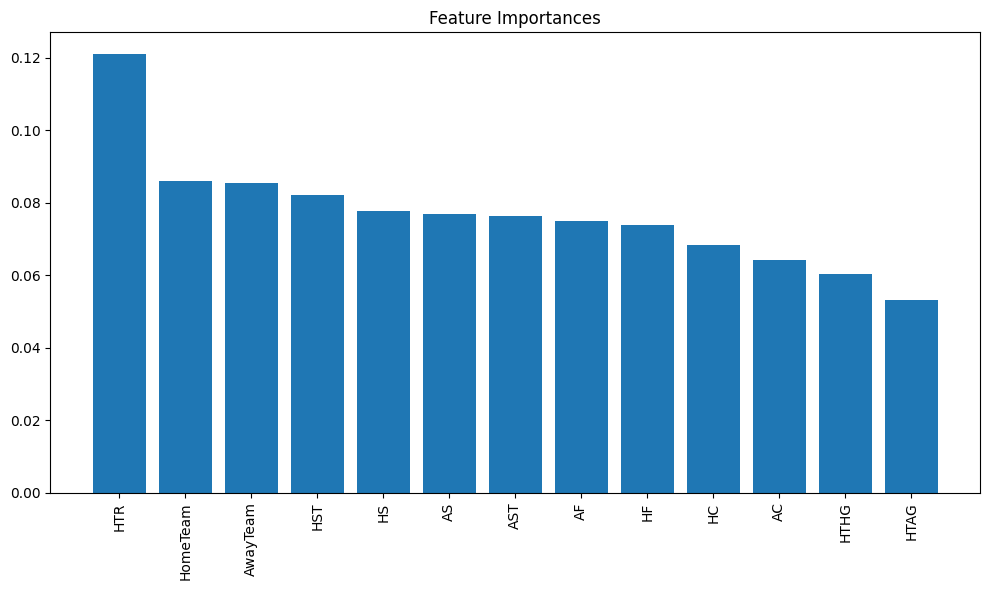

In [8]:
outcome_features_train = train.drop(columns=['Season','Referee','FTR','FTHG','FTAG','AR','HR','HY','AY'])
outcome_features_test = test.drop(columns=['Season','Referee','FTR','FTHG','FTAG','AR','HR','HY','AY'])


outcome_target_train = train['FTR']
outcome_target_test = test['FTR']



outcome_model = RandomForestClassifier(n_estimators=100, random_state=42)
outcome_model.fit(outcome_features_train, outcome_target_train)

# Get feature importances
feature_importances = outcome_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot the top features
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(len(sorted_indices)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(sorted_indices)), outcome_features_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [9]:
outcome_predictions = outcome_model.predict(outcome_features_test)

outcome_acc = accuracy_score(outcome_target_test,outcome_predictions)
print(outcome_acc)


#PRINCIPLE COMPONENT ANALYSIS DO IMAGE ANALYSIS HOMEWORK############################

0.6421391234418978
